Predict stock market price for Norwegian airlines.

I want you to make a prediction algorithm which predicts the price of this stock on a specific date. 

Input will be date and output should be price of that stock (close value in the data file). 
You should also show the predction percentage score. 

Data file: NAS.csv

Explore and research which algorithm would work best for this use case (regression or classification)

Document your findings in a ReadMe.md file (3-5 lines) on why you chose this algorithm.

## Findings

- Since the algorithm must return the price of the stock on a specific date, this is a regression problem


## TODO
- Check out gradient boost decision trees
- Decide on a algorithm
- Write a function that returns the predicted stockprice on a specific date


In [121]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

In [122]:
df = pd.read_csv("NAS.csv")                         #Read the csv

In [123]:
df.iloc[:, 0]= pd.to_datetime(df.iloc[:, 0])        #Convert date to datetime  
df.set_index('Date',inplace=True)                   #Setting date as index

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4253 entries, 2003-12-18 to 2020-10-16
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       4218 non-null   float64
 1   High       4218 non-null   float64
 2   Low        4218 non-null   float64
 3   Close      4218 non-null   float64
 4   Adj Close  4218 non-null   float64
 5   Volume     4218 non-null   float64
dtypes: float64(6)
memory usage: 232.6 KB


In [125]:
df.replace(0, np.nan, inplace=True) #Replacing 0 with NaN

In [126]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2003-12-18,19.482599,19.596901,19.025499,19.139799,19.139799,4978496.0
2003-12-19,19.368299,19.425501,18.282801,18.454201,18.454201,1410901.0
2003-12-22,18.739901,18.739901,17.997101,18.054300,18.054300,137047.0
2003-12-23,17.997101,17.997101,17.368700,17.425800,17.425800,229418.0
2003-12-24,NaN,NaN,NaN,NaN,NaN,NaN


In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4253 entries, 2003-12-18 to 2020-10-16
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       4218 non-null   float64
 1   High       4218 non-null   float64
 2   Low        4218 non-null   float64
 3   Close      4218 non-null   float64
 4   Adj Close  4218 non-null   float64
 5   Volume     4204 non-null   float64
dtypes: float64(6)
memory usage: 232.6 KB


In [128]:
df.isnull().sum()/len(df)*100  #Checking % of data that's 0

Open         0.822949
High         0.822949
Low          0.822949
Close        0.822949
Adj Close    0.822949
Volume       1.152128
dtype: float64

In [129]:
df.dropna(inplace=True)  #Dropping all columns with NaN
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2003-12-18,19.482599,19.596901,19.025499,19.139799,19.139799,4978496.0
2003-12-19,19.368299,19.425501,18.282801,18.454201,18.454201,1410901.0
2003-12-22,18.739901,18.739901,17.997101,18.054300,18.054300,137047.0
2003-12-23,17.997101,17.997101,17.368700,17.425800,17.425800,229418.0
2003-12-29,17.425800,17.425800,16.854500,17.254400,17.254400,196206.0


In [130]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4204.000000,4204.000000,4204.000000,4204.000000,4204.000000,4.204000e+03
mean,79.895867,81.192986,78.314685,79.729549,79.729549,1.734079e+06
std,55.190463,55.964363,54.334272,55.112770,55.112770,1.031195e+07
min,0.601000,0.620000,0.585000,0.600600,0.600600,3.500000e+02
25%,37.693650,38.377500,36.565601,37.419450,37.419450,1.038025e+05
50%,63.989799,64.846802,62.561401,63.989799,63.989799,3.328355e+05
75%,128.550995,130.779007,126.265999,128.550995,128.550995,7.037935e+05
max,219.335999,220.535995,213.509003,216.822006,216.822006,4.075113e+08


In [131]:
X = df[['Close', 'Open']]
y= (df['Close'].shift(1)) #Since we are shifting by one, the first row of y become NaN

In [132]:
y.drop(y.head(1).index,inplace = True) #Drop the Nan Row in bouth x and y to keep symentri
X.drop(X.head(1).index,inplace = True) 


D:\Programering\Programmer\Anaconda\envs\dave3625\lib\site-packages\pandas\core\frame.py:4160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


# COPYPASTA FROM:
https://stackabuse.com/linear-regression-in-python-with-scikit-learn/

LINEAR REGRESSION

- To improve the algorithm, we could train/test on the data before mars 2020, and add that data later
    This because after corona hit, the stock fell in a unuseal maner

In [133]:
from sklearn.model_selection import train_test_split #Creating a train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [134]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)  #Fits it with a linar regression

LinearRegression()

In [135]:
#To test on spesific data

from pandas import DataFrame
a=[0.748, 0.6844]   #a = Close, Open
test=pd.DataFrame([a])

In [136]:
print(regressor.predict(test))

[0.66887647]


In [137]:
print(regressor.intercept_)

-0.01295284394814189


In [138]:
print(regressor.coef_)

[-0.01805632  1.01597814]


In [139]:
y_pred = regressor.predict(X_test)

In [140]:
df2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df2.sort_values(by='Date',inplace=True) 
df2

,Actual,Predicted
Date,,
2003-12-22,18.454201,18.700383
2003-12-23,18.054300,17.957062
2003-12-30,17.254400,17.371474
2004-01-02,17.711500,17.892860
2004-01-09,16.740200,16.738091
...,...,...
2020-10-07,0.990000,0.982099
2020-10-08,0.922600,0.914319
2020-10-09,0.917800,0.787255


<AxesSubplot:xlabel='Date'>

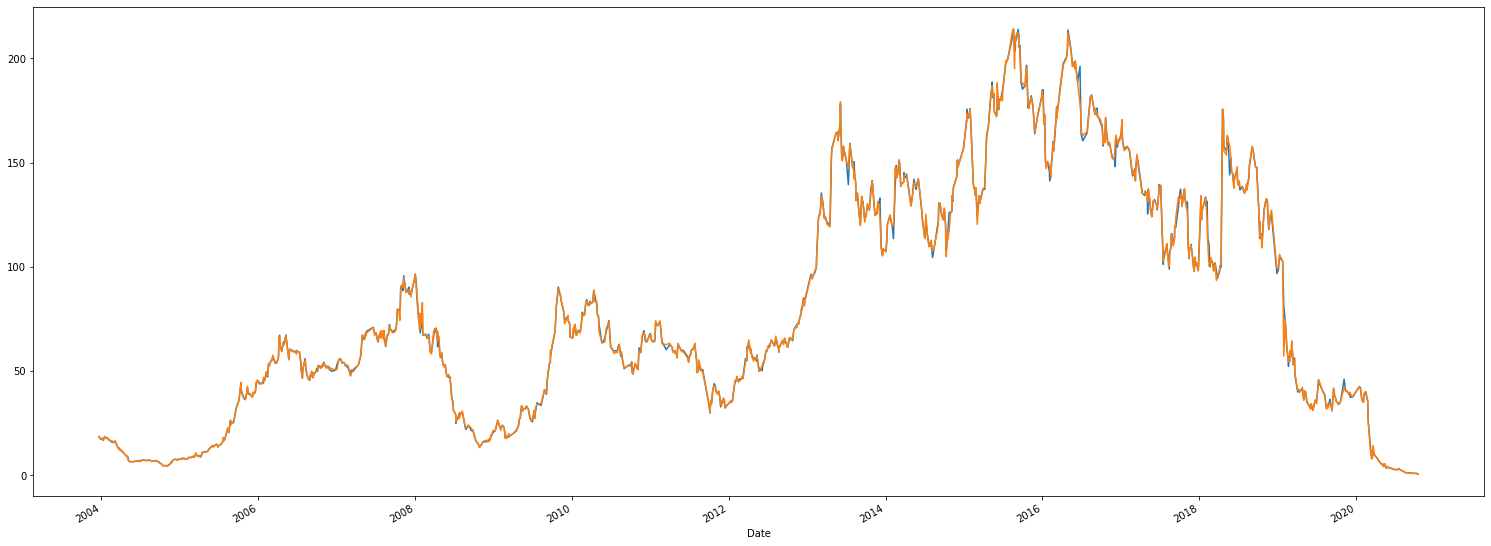

In [141]:
df2['Actual'].plot(figsize=(26,10))
df2['Predicted'].plot(figsize=(26,10))

In [142]:
#df2.isnull().sum()/len(df)*100  #Checking % of data that's 0
df2.dropna(inplace=True)

In [143]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(df2['Actual'], df2['Predicted']))
print('Mean Squared Error:', metrics.mean_squared_error(df2['Actual'], df2['Predicted']))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(df2['Actual'], df2['Predicted'])))
print("Score:", regressor.score(X_test, y_test))

Mean Absolute Error: 0.7402256959871126
Mean Squared Error: 2.687411280876574
Root Mean Squared Error: 1.6393325717732121
Score: 0.9990897433579428


In [144]:
r=(df2['Actual']/df2['Predicted'])



<AxesSubplot:xlabel='Date'>

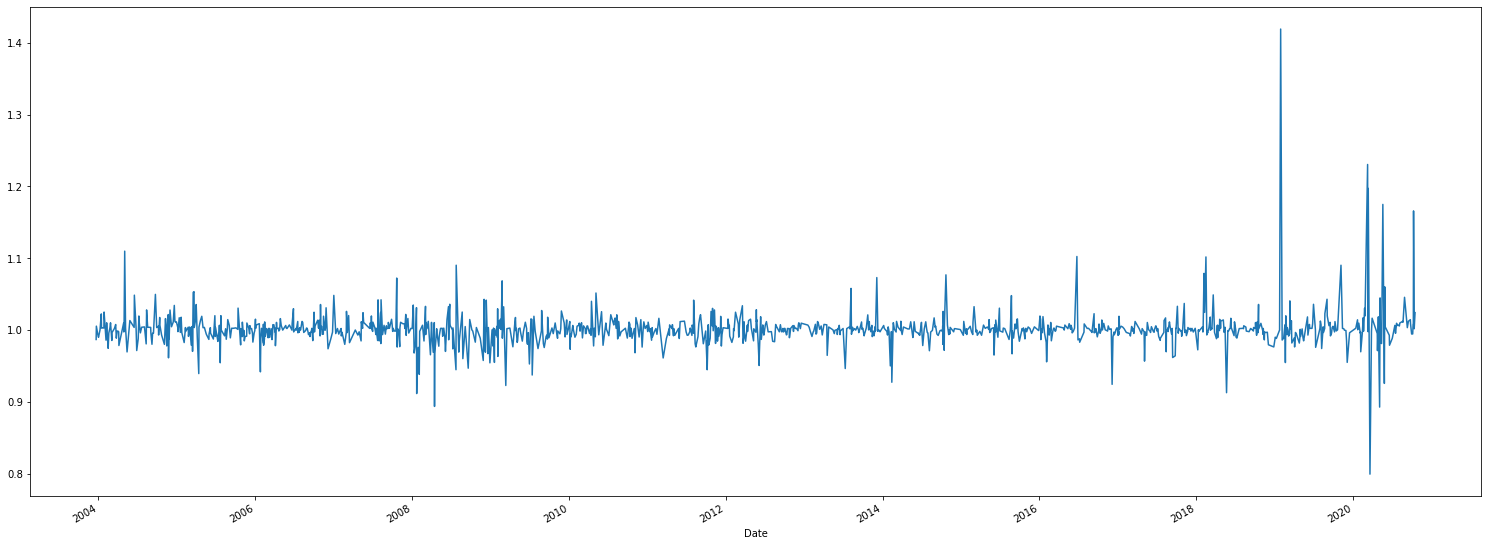

In [145]:
r.plot(figsize=(26,10))

## SGDRegressor

In [146]:
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing

In [147]:
# standardizing data
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test=scaler.transform(X_test)

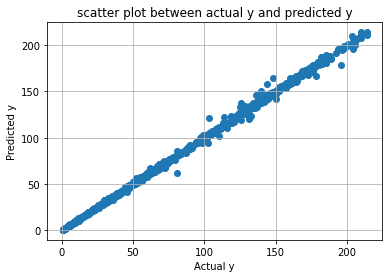

Mean Squared Error : 3.540867325988252
Mean Absolute Error : 0.9525474846133105
Score: 0.9988006681280757


In [151]:
# SkLearn SGD classifier
clf_ = SGDRegressor()
clf_.fit(X_train, y_train)
plt.scatter(y_test,clf_.predict(X_test))
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('scatter plot between actual y and predicted y')
plt.show()
print('Mean Squared Error :',metrics.mean_squared_error(y_test, clf_.predict(X_test)))
print('Mean Absolute Error :',metrics.mean_absolute_error(y_test, clf_.predict(X_test)))
print("Score:", clf_.score(X_test, y_test))

In [150]:
y_pred = clf_.predict(X_test)
df3 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df3.sort_values(by='Date',inplace=True) 
df3

,Actual,Predicted
Date,,
2003-12-22,18.454201,18.454598
2003-12-23,18.054300,17.756320
2003-12-30,17.254400,17.512815
2004-01-02,17.711500,17.851926
2004-01-09,16.740200,17.015915
...,...,...
2020-10-07,0.990000,0.965611
2020-10-08,0.922600,0.922556
2020-10-09,0.917800,0.758443


<AxesSubplot:xlabel='Date'>

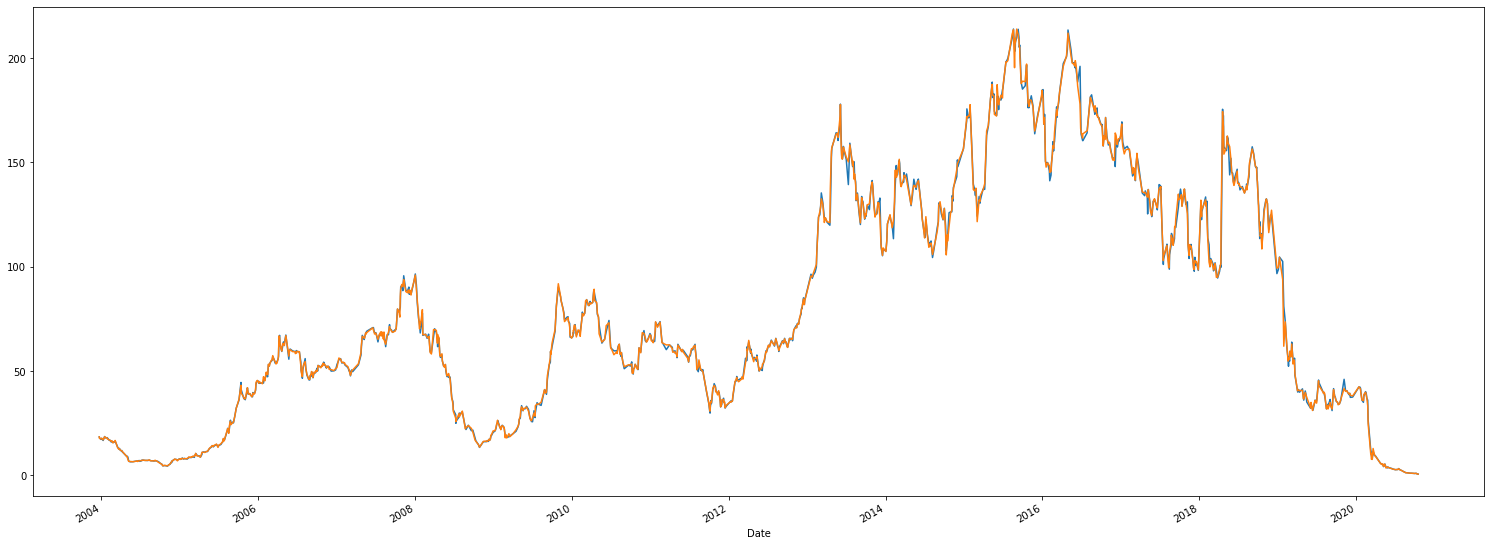

In [152]:
df3['Actual'].plot(figsize=(26,10))
df3['Predicted'].plot(figsize=(26,10))

## Random forest
- Some issues, need fixing

In [40]:
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_val_predict
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler

In [41]:
X = df[['Close']]
y= (df['Close'].shift(-1))
y.dropna(inplace=True)
#X.dropna(inplace=True)
X.drop(X.tail(1).index,inplace=True) # drop last n rows

D:\Programering\Programmer\Anaconda\envs\dave3625\lib\site-packages\pandas\core\frame.py:4160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [61]:
def rfr_model(X, y):# Perform Grid-Search
    gsc = GridSearchCV(
        estimator=RandomForestRegressor(),
        param_grid={
            'max_depth': range(3,20),
            'n_estimators': (10, 50, 100, 1000, 2000, 4000),
        },
        cv=5, scoring='neg_mean_squared_error', verbose=0,n_jobs=-1)

    grid_result = gsc.fit(X, y)
    best_params = grid_result.best_params_

    rfr = RandomForestRegressor(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"],random_state=False, verbose=False)# Perform K-Fold CV
    scores = cross_val_score(rfr, X, y, cv=10, scoring='neg_mean_absolute_error')
    predictions = cross_val_predict(rfr, X, y, cv=10)
  
    return predictions

In [62]:
output = (rfr_model(X,y))

In [66]:
scores

array([-0.89351676, -0.94524783, -1.0245973 , -0.99098922, -0.8672249 ,
       -0.75121111, -1.10817793, -0.86360605, -0.94301761, -0.96530507])

In [67]:
for val in output:
    print(val, end=" ")

19.22849684115422 19.29095424115422 18.225722630661593 17.651430945962634 17.373988502932328 17.651430945962634 17.651430945962634 17.651430945962634 17.651430945962634 17.44447867043233 16.61105074618761 17.651430945962634 17.36028849596263 18.506613399643076 19.175205442008924 19.22849684115422 19.29095424115422 17.16617224444748 18.225722630661593 18.225722630661593 19.29095424115422 18.225722630661593 18.225722630661593 18.225722630661593 17.509219169295967 17.44447867043233 17.2150619985845 16.89320875284091 17.2150619985845 16.89320875284091 16.89320875284091 16.89320875284091 17.44447867043233 16.89320875284091 16.298657309280806 16.61105074618761 16.228666799280806 16.228666799280806 16.298657309280806 16.298657309280806 16.298657309280806 15.240883310668499 15.240883310668499 15.606153310668498 16.228666799280806 16.228666799280806 16.228666799280806 15.472025351471768 15.606153310668498 16.228666799280806 16.298657309280806 17.2150619985845 16.89320875284091 16.89320875284091

 154.4516900757224 165.70688611863434 166.30747784632212 175.81489611386405 171.46496399742637 171.46496399742637 160.86948280300197 157.05146423123898 150.43419709065128 176.20669013064125 171.46496399742637 174.37127749689128 174.07417791689127 171.46496399742637 156.1138387875149 164.58012703778306 167.51037232983194 162.47775704386441 162.10007939521944 160.86948280300197 157.0534118814435 156.1138387875149 147.47923077459328 157.05146423123898 150.43419709065128 154.1251522579252 152.29764985351733 148.4397743104893 145.90517712212383 145.90517712212383 148.17561681865567 145.90517712212383 145.90517712212383 140.22269190231765 150.1721690602106 140.22269190231765 138.09265148364244 139.90026169565098 144.7988458887868 140.30515808742845 144.99306976021063 142.66673915571772 157.49253960123897 163.02826466682373 157.99100129297042 157.49253960123897 153.17150050779455 148.17561681865567 142.66673915571772 139.90026169565098 140.22269190231765 142.66673915571772 139.33002926753133 

In [68]:
df3=X

In [69]:
df3["Pred"]=output

<ipython-input-69-2c7a57dfa087>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["Pred"]=output


In [70]:
df3.tail(200)

,Close,Pred
Date,,
2019-12-27,37.820000,38.122379
2019-12-30,37.750000,38.122379
2020-01-02,40.939999,39.450599
2020-01-03,39.860001,39.230525
2020-01-06,38.570000,38.328470
...,...,...
2020-10-09,0.696400,4.569138
2020-10-12,0.676800,4.569138
2020-10-13,0.600600,4.569138


In [71]:
print(output)

[19.22849684 19.29095424 18.22572263 ...  4.56913758  4.56913758
  4.56913758]


<AxesSubplot:xlabel='Date'>

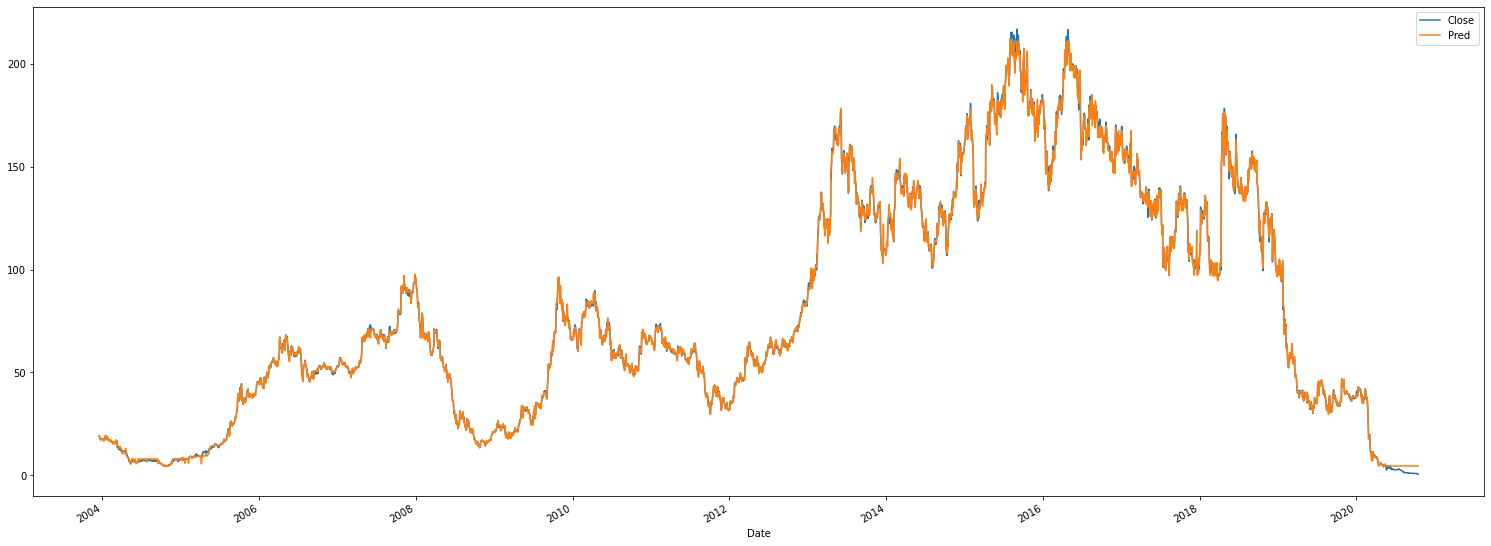

In [72]:
df3.plot(figsize=(26,10))

<AxesSubplot:xlabel='Date'>

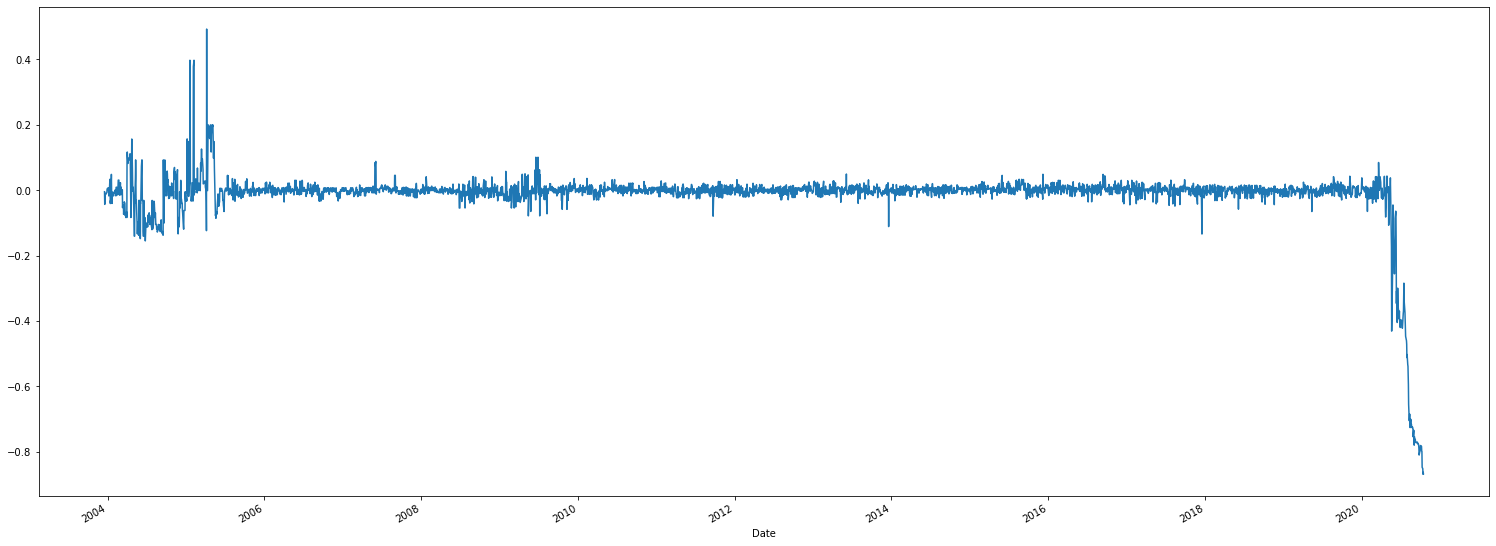

In [73]:
r=(df3['Close']/df3['Pred'])-1

r.plot(figsize=(26,10))

In [60]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(df2['Actual'], df2['Predicted']))
print('Mean Squared Error:', metrics.mean_squared_error(df2['Actual'], df2['Predicted']))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(df2['Actual'], df2['Predicted'])))
print("Score:", rfr.score(X_test, y_test))

Mean Absolute Error: 0.7085179253656939
Mean Squared Error: 1.8251396467052063
Root Mean Squared Error: 1.350977293186383


NameError: name 'rfr' is not defined

## Testing the tutorial from 
https://towardsdatascience.com/time-series-forecasting-predicting-stock-prices-using-facebooks-prophet-model-9ee1657132b5


## Didn't work as expected, poor preformance, (like stockprice = -50nok in 2021), and a very simple alg!

In [14]:
data = pd.read_csv("NAS.csv")     

In [16]:
# Select only the important features i.e. the date and price
data = data[["Date","Close"]] # select Date and Price# Rename the features: These names are NEEDED for the model fitting
data = data.rename(columns = {"Date":"ds","Close":"y"}) #renaming the columns of the dataset
data.head(5)

,ds,y
0,2003-12-18,19.139799
1,2003-12-19,18.454201
2,2003-12-22,18.054300
3,2003-12-23,17.425800
4,2003-12-24,NaN


In [17]:
#!pip install fbprophet
from fbprophet import Prophet
m = Prophet(daily_seasonality = True) # the Prophet class (model)
m.fit(data) # fit the model using all data

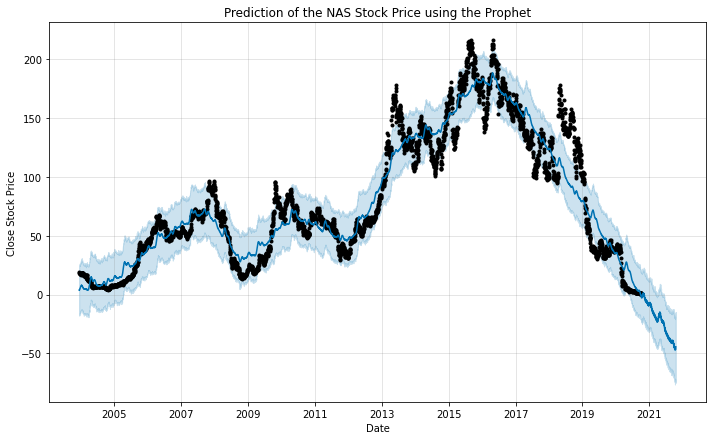

In [18]:
future = m.make_future_dataframe(periods=365) #we need to specify the number of days in future
prediction = m.predict(future)
m.plot(prediction)

plt.title("Prediction of the NAS Stock Price using the Prophet")
plt.xlabel("Date")
plt.ylabel("Close Stock Price")
plt.show()


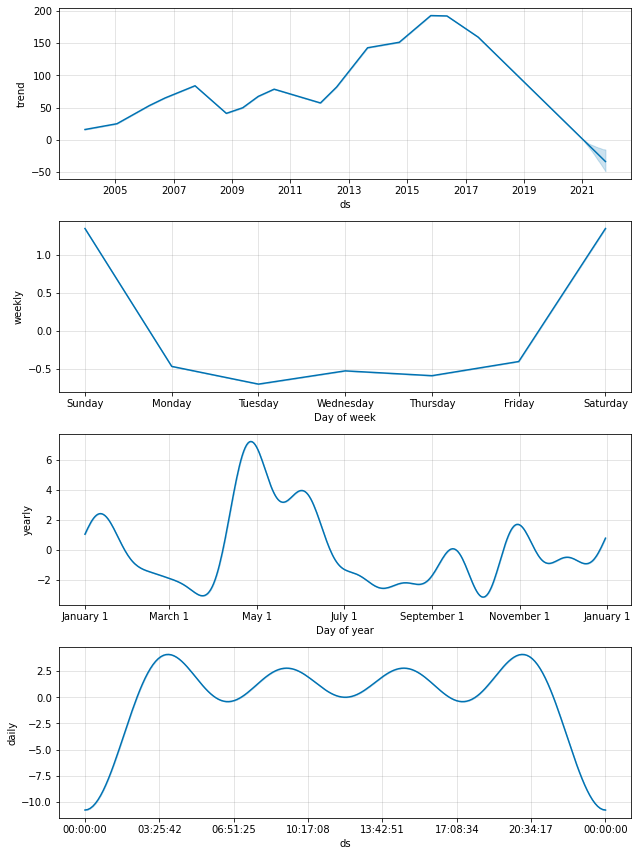

In [19]:
m.plot_components(prediction)
plt.show()